In [52]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.optimize as optimization
import datetime

In [53]:
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
NUM_PORTFOLIOS = 10000
NUM_TRADING_DAYS = 252

In [54]:
start_date = '2012-01-01'
end_date = '2024-07-09'

In [55]:
def download_data():
    # name of the stock (key) - stock values (2010-date) as the values
    stock_data = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
    return pd.DataFrame(stock_data)

In [56]:
def show_data(data):
    data.plot(figsize=(10, 5))
    plt.show()

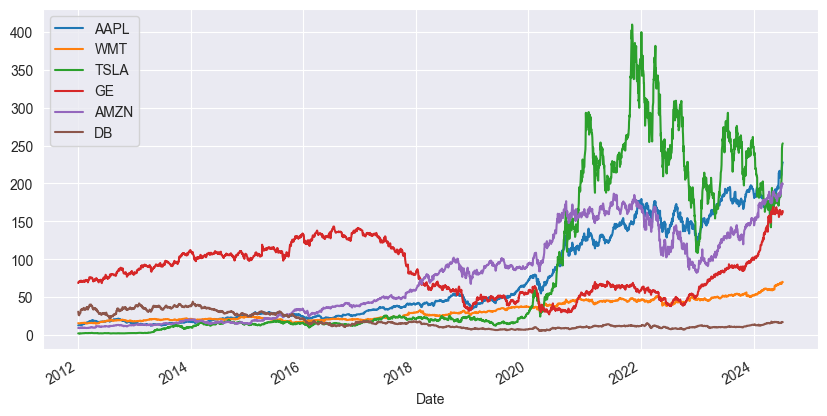

In [57]:
show_data(download_data())

In [58]:
def calculate_return(data):
    log_return = np.log(data/data.shift(1))
    return log_return[1:]

In [59]:
def show_statistics(returns):
    print(returns.mean() * NUM_TRADING_DAYS)
    print(returns.cov() * NUM_TRADING_DAYS)

In [60]:
def show_mean_variance(returns, weights):
    portfolio_return = np.sum(returns.mean()*weights) * NUM_TRADING_DAYS
    portfolio_volatility = np.sqrt(weights.T, np.dot(returns.cov()))
    
    print('Expected portfolio mean (return): ', portfolio_return)
    print('Expected portfolio volatility (standard deviation): ', portfolio_volatility)

In [61]:
def generate_portfolios(returns):
    portfolio_means = []
    portfolio_risks = []
    portfolio_weights = []
    for _ in range(NUM_PORTFOLIOS):
        w = np.random.random(len(stocks))
        w /= np.sum(w)
        portfolio_weights.append(w)
        portfolio_means.append(np.sum(returns.mean()*w) * NUM_TRADING_DAYS)
        portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov() *NUM_TRADING_DAYS, w))))
    
    return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)

In [62]:
def show_portfolios(returns, volatilities):
    plt.figure(figsize=(10, 6))
    plt.scatter(volatilities, returns, c=returns/volatilities, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')

In [64]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))
    
    return np.array([portfolio_return, portfolio_volatility, portfolio_return / portfolio_volatility])

In [65]:
def min_function_sharpe(weights, returns):
    return -statistics(weights, returns)[2]

In [ ]:
def optimize_portfolio(weights, returns):
    # the sum of the weights is 1
    constraints = {'type':'eq', 'fun': lambda x: np.sum(x)-1}
    bounds = tuple((0, 1)) for _ in range(len(stocks))

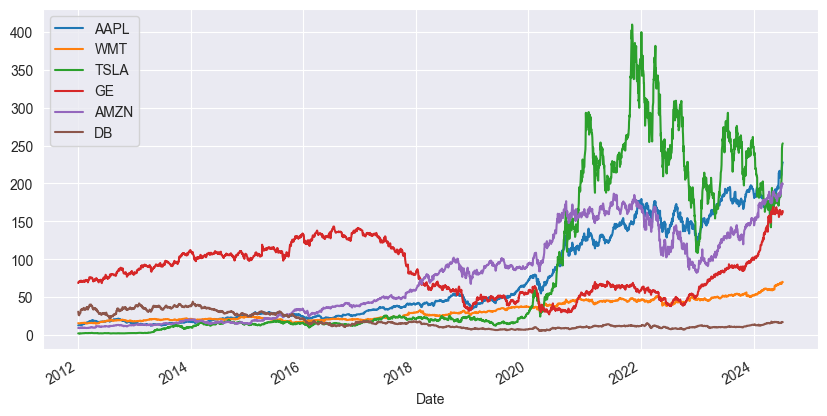

AAPL    0.233055
WMT     0.121039
TSLA    0.392991
GE      0.069711
AMZN    0.248551
DB     -0.048172
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.080375  0.015972  0.059062  0.028734  0.043350  0.034262
WMT   0.015972  0.039041  0.015782  0.011121  0.015023  0.013130
TSLA  0.059062  0.015782  0.317409  0.038579  0.064430  0.051384
GE    0.028734  0.011121  0.038579  0.100698  0.025820  0.054716
AMZN  0.043350  0.015023  0.064430  0.025820  0.103543  0.034420
DB    0.034262  0.013130  0.051384  0.054716  0.034420  0.153162


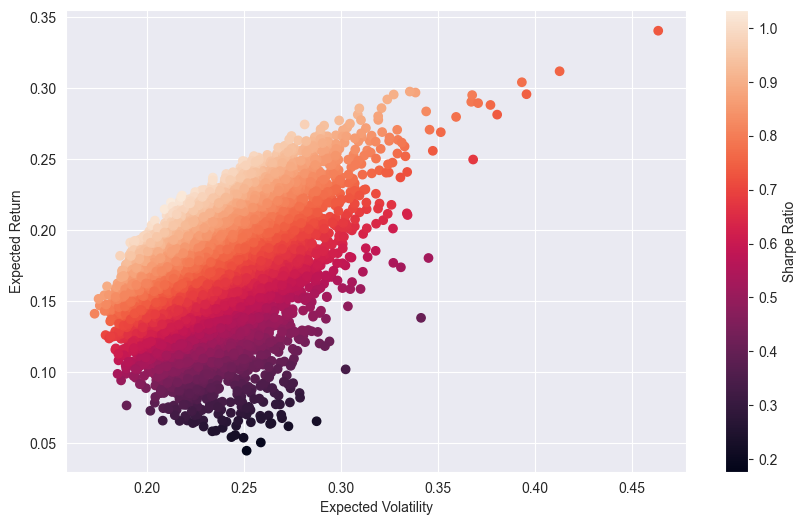

In [63]:
dataset = download_data()
show_data(dataset)
log_daily_returns = calculate_return(dataset)
show_statistics(log_daily_returns)

weights, means, risks =  generate_portfolios(log_daily_returns)
show_portfolios(means, risks)